In [7]:
# installation of msoffcrypto-tool library to read password protected excel file.
pip install msoffcrypto-tool

Note: you may need to restart the kernel to use updated packages.


In [1]:
# library imports
import numpy as np
import pandas as pd
import msoffcrypto
import io
import datetime
import math

In [2]:
# Reading pool file which is password protected
temp = io.BytesIO()

with open('Coding_Assignment_Pool.xlsx', 'rb') as f:
    excel = msoffcrypto.OfficeFile(f)
    excel.load_key('Crisilgac@123')
    excel.decrypt(temp)

df = pd.read_excel(temp)
del temp    # Delete temp document as it is not needed after dataframe creation

### Preprocessing

In [3]:
df.head()

,property.id,original.bal,adjusted.bal,origination.date,maturity.date,current.int.rate,payment.due,interest.product,int.switch.date,employment.status,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,P1,91943,45971.5,2007-05-29,2032-05-28,0.0235,381.91,Capped,2020-01-01,employed full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P2,86906,43453.0,2007-05-29,2032-05-28,0.0235,381.91,DISCOUNT,2020-01-01,employed full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P3,82323,41161.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Life,2020-01-01,employed full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P4,99322,49661.0,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Reset,2020-01-01,employed full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P5,88809,44404.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Voluntary,2020-01-01,employed full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking all the columns
df.columns

Index(['property.id', 'original.bal', 'adjusted.bal', 'origination.date',
       'maturity.date', 'current.int.rate', 'payment.due', 'interest.product',
       'int.switch.date', 'employment.status', 'occupancy.type', 'region',
       'postcode', 'property.type', 'loan.status', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37'],
      dtype='object')

As from above columns after loan.status are error as loan.status is the last column. 
So we will remove columns starting with **'Unnamed:'**

In [5]:
pool_df = df.loc[:, ~df.columns.str.match("Unnamed")]
pool_df.head()

,property.id,original.bal,adjusted.bal,origination.date,maturity.date,current.int.rate,payment.due,interest.product,int.switch.date,employment.status,occupancy.type,region,postcode,property.type,loan.status
0,P1,91943,45971.5,2007-05-29,2032-05-28,0.0235,381.91,Capped,2020-01-01,employed full,own,london,WC2N,flat,red
1,P2,86906,43453.0,2007-05-29,2032-05-28,0.0235,381.91,DISCOUNT,2020-01-01,employed full,own,london,WC2N,flat,rep
2,P3,82323,41161.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Life,2020-01-01,employed full,own,london,WC2N,flat,def
3,P4,99322,49661.0,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Reset,2020-01-01,employed full,own,london,WC2N,flat,pos
4,P5,88809,44404.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Voluntary,2020-01-01,employed full,own,london,WC2N,flat,arr


#### Check dataframe for missing values

In [6]:
pool_df.isnull().sum()

property.id           0
original.bal          0
adjusted.bal          0
origination.date      0
maturity.date         0
current.int.rate      0
payment.due           0
interest.product      0
int.switch.date       0
employment.status     0
occupancy.type        0
region                0
postcode             44
property.type         0
loan.status           0
dtype: int64

####  postalcode column has 44 missing values, but it will not affect the calculation of  weighted average foreclosure frequency (𝑊𝐴𝐹𝐹) for the loan pool. So we can simply ignore the postalcode column

### Calculation of WAFF

We Start with the assumption that the base foreclosure frequency for a hypothetical loan pool is 12%. 
From here on, we examine the given pool and make adjustments to this base foreclosure 
frequency. (Thus 𝑓𝑓i = 12%) 

#### Formula for WAFF

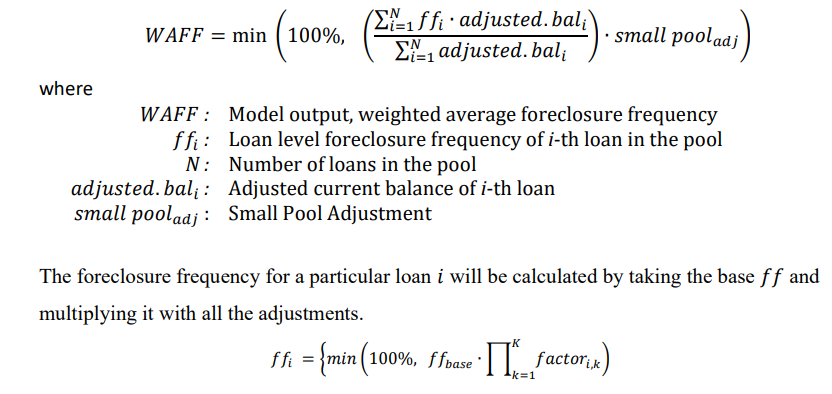

### Let us start by calculating loan level foreclousure frequency (𝑓𝑓i) first

In [7]:
# calculation of property occupancy adjustment

def prop_occupancy_adjustment(df):
    
    for index, row in df.iterrows():
        if row['occupancy.type'] == 'sh':
            pool_df['property.occupancy.adjustment'] = 1.2
        elif row['occupancy.type'] == 'btl':
            pool_df['property.occupancy.adjustment'] = 1.3
        else:
            pool_df['property.occupancy.adjustment'] = 1
    return df



In [8]:
new_pool_df =prop_occupancy_adjustment(pool_df)
new_pool_df.head()

<ipython-input-7-e0693925653a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pool_df['property.occupancy.adjustment'] = 1
<ipython-input-7-e0693925653a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pool_df['property.occupancy.adjustment'] = 1.3
<ipython-input-7-e0693925653a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,property.id,original.bal,adjusted.bal,origination.date,maturity.date,current.int.rate,payment.due,interest.product,int.switch.date,employment.status,occupancy.type,region,postcode,property.type,loan.status,property.occupancy.adjustment
0,P1,91943,45971.5,2007-05-29,2032-05-28,0.0235,381.91,Capped,2020-01-01,employed full,own,london,WC2N,flat,red,1.2
1,P2,86906,43453.0,2007-05-29,2032-05-28,0.0235,381.91,DISCOUNT,2020-01-01,employed full,own,london,WC2N,flat,rep,1.2
2,P3,82323,41161.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Life,2020-01-01,employed full,own,london,WC2N,flat,def,1.2
3,P4,99322,49661.0,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Reset,2020-01-01,employed full,own,london,WC2N,flat,pos,1.2
4,P5,88809,44404.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Voluntary,2020-01-01,employed full,own,london,WC2N,flat,arr,1.2


In [9]:
#calculation of payment shock time for payment shock adjustment

def payment_shock_time(df):
    
    asof_date = datetime.datetime(2020, 3, 31).date()
    for index, row in df.iterrows():
        int_switch_date = row['int.switch.date'].date()
        date_difference = ((asof_date - int_switch_date)/365)*12


        if int_switch_date != "1970-01-01" and  date_difference.days > 6:
            df['payment.shock.time'] = "pastgr6m"
        elif int_switch_date != "1970-01-01" and date_difference.days <=6:
            df['payment.shock.time'] = "le6m"
        else:
            df['payment.shock.time'] = "missing"
    return df

In [13]:
#calculation of payment shock adjustment 

def payment_shock_adjustment(df):
    for index, row in df.iterrows():
        if row['interest.product'] == 'DISCOUNT' and row['payment.shock.time'] == "le6m":
            df['payment.shock.adjustment'] = 1.5
        else:
            df['payment.shock.adjustment'] = 1
    return df

In [11]:
new_pool_df = payment_shock_time(new_pool_df)

<ipython-input-9-f3bc9e1b1c2a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment.shock.time'] = "le6m"


,property.id,original.bal,adjusted.bal,origination.date,maturity.date,current.int.rate,payment.due,interest.product,int.switch.date,employment.status,occupancy.type,region,postcode,property.type,loan.status,property.occupancy.adjustment,payment.shock.time
0,P1,91943,45971.5,2007-05-29,2032-05-28,0.0235,381.91,Capped,2020-01-01,employed full,own,london,WC2N,flat,red,1.2,le6m
1,P2,86906,43453.0,2007-05-29,2032-05-28,0.0235,381.91,DISCOUNT,2020-01-01,employed full,own,london,WC2N,flat,rep,1.2,le6m
2,P3,82323,41161.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Life,2020-01-01,employed full,own,london,WC2N,flat,def,1.2,le6m
3,P4,99322,49661.0,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Reset,2020-01-01,employed full,own,london,WC2N,flat,pos,1.2,le6m
4,P5,88809,44404.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Voluntary,2020-01-01,employed full,own,london,WC2N,flat,arr,1.2,le6m


In [14]:
new_pool_df = payment_shock_adjustment(new_pool_df)

new_pool_df.head()

<ipython-input-13-8fe0e46f11cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment.shock.adjustment'] = 1
<ipython-input-13-8fe0e46f11cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment.shock.adjustment'] = 1.5


,property.id,original.bal,adjusted.bal,origination.date,maturity.date,current.int.rate,payment.due,interest.product,int.switch.date,employment.status,occupancy.type,region,postcode,property.type,loan.status,property.occupancy.adjustment,payment.shock.time,payment.shock.adjustment
0,P1,91943,45971.5,2007-05-29,2032-05-28,0.0235,381.91,Capped,2020-01-01,employed full,own,london,WC2N,flat,red,1.2,le6m,1.5
1,P2,86906,43453.0,2007-05-29,2032-05-28,0.0235,381.91,DISCOUNT,2020-01-01,employed full,own,london,WC2N,flat,rep,1.2,le6m,1.5
2,P3,82323,41161.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Life,2020-01-01,employed full,own,london,WC2N,flat,def,1.2,le6m,1.5
3,P4,99322,49661.0,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Reset,2020-01-01,employed full,own,london,WC2N,flat,pos,1.2,le6m,1.5
4,P5,88809,44404.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Voluntary,2020-01-01,employed full,own,london,WC2N,flat,arr,1.2,le6m,1.5


In [15]:
#calculation of Geo concentration adjustment

def geo_concentration_adjustment(df):
    total_adjusted_bal = df['adjusted.bal'].sum()
    temp_df = df.groupby('region').sum()
    
    for index, row in temp_df.iterrows():
        temp_df['geo.concentration'] = temp_df['adjusted.bal']/ total_adjusted_bal

    temp_df =pd.merge(df, temp_df, on = 'region')
    
    return temp_df

In [16]:
new_pool_df = geo_concentration_adjustment(new_pool_df)
new_pool_df.head()

,property.id,original.bal_x,adjusted.bal_x,origination.date,maturity.date,current.int.rate_x,payment.due_x,interest.product,int.switch.date,employment.status,...,property.occupancy.adjustment_x,payment.shock.time,payment.shock.adjustment_x,original.bal_y,adjusted.bal_y,current.int.rate_y,payment.due_y,property.occupancy.adjustment_y,payment.shock.adjustment_y,geo.concentration
0,P1,91943,45971.5,2007-05-29,2032-05-28,0.0235,381.91,Capped,2020-01-01,employed full,...,1.2,le6m,1.5,7170095,3585047.5,1.93282,62233.34,94.8,118.5,0.340894
1,P2,86906,43453.0,2007-05-29,2032-05-28,0.0235,381.91,DISCOUNT,2020-01-01,employed full,...,1.2,le6m,1.5,7170095,3585047.5,1.93282,62233.34,94.8,118.5,0.340894
2,P3,82323,41161.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Life,2020-01-01,employed full,...,1.2,le6m,1.5,7170095,3585047.5,1.93282,62233.34,94.8,118.5,0.340894
3,P4,99322,49661.0,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Reset,2020-01-01,employed full,...,1.2,le6m,1.5,7170095,3585047.5,1.93282,62233.34,94.8,118.5,0.340894
4,P5,88809,44404.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Voluntary,2020-01-01,employed full,...,1.2,le6m,1.5,7170095,3585047.5,1.93282,62233.34,94.8,118.5,0.340894


In [17]:
#calculation of Small pool adjustment

def small_pool_adjustment(df):
    if len(df) == 1:
        small_pool_adj = 1
    elif len(df) > 1 and len(df) <=250:
        small_pool_adj = 16.0839/ math.log(len(df))
    else:
        small_pool_adj = 1
    
    return small_pool_adj

#### It is instructed to assume that the base foreclosure frequency for a hypothetical loan pool is 12%. i.e. 0.12

In [24]:


ff_base = 0.12
for index, row in new_pool_df.iterrows():
        new_pool_df['factor'] = ff_base*(new_pool_df[['property.occupancy.adjustment_x', 'payment.shock.adjustment_x','geo.concentration']].product())
        
        new_pool_df['ffi'] = min(1, row['factor'])
new_pool_df.head()

,property.id,original.bal_x,adjusted.bal_x,origination.date,maturity.date,current.int.rate_x,payment.due_x,interest.product,int.switch.date,employment.status,...,payment.shock.adjustment_x,original.bal_y,adjusted.bal_y,current.int.rate_y,payment.due_y,property.occupancy.adjustment_y,payment.shock.adjustment_y,geo.concentration,factor,ffi
0,P1,91943,45971.5,2007-05-29,2032-05-28,0.0235,381.91,Capped,2020-01-01,employed full,...,1.5,7170095,3585047.5,1.93282,62233.34,94.8,118.5,0.340894,NaN,1
1,P2,86906,43453.0,2007-05-29,2032-05-28,0.0235,381.91,DISCOUNT,2020-01-01,employed full,...,1.5,7170095,3585047.5,1.93282,62233.34,94.8,118.5,0.340894,NaN,1
2,P3,82323,41161.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Life,2020-01-01,employed full,...,1.5,7170095,3585047.5,1.93282,62233.34,94.8,118.5,0.340894,NaN,1
3,P4,99322,49661.0,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Reset,2020-01-01,employed full,...,1.5,7170095,3585047.5,1.93282,62233.34,94.8,118.5,0.340894,NaN,1
4,P5,88809,44404.5,2007-05-29,2032-05-28,0.0235,381.91,Fixed_Voluntary,2020-01-01,employed full,...,1.5,7170095,3585047.5,1.93282,62233.34,94.8,118.5,0.340894,NaN,1


In [27]:
# Calculation of WAFF

def WAFF(df):
  
    numerator = sum([df['ffi'][i]*df['adjusted.bal_y'][i] for i in range(len(df))])
    denominator = sum(df['adjusted.bal_y'])
    
    waff = min(1,round(numerator/denominator,2))
    
    return waff

In [32]:
waff = WAFF(new_pool_df)


#### It is instructed to take WALF value as 40% i.e. 0.40

In [29]:
walf = 0.4
CC = waff * 0.4

In [31]:
print('Credit coverage of the pool = {}%'.format(CC*100))

Credit coverage of the pool = 40.0%


### Thus the Credit Coverage of the pool is 40%

### Thank you!